In [1]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt     # for plotting graph
plt.rc("font", size=14)
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns               # for intractve graphs
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
archive_df.shape

(2356, 17)

In [5]:
archive_df.tweet_id.duplicated().sum()

0

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [9]:
image_predictions_df.tweet_id.duplicated().sum()

0

### I can't share the key and secret details

In [10]:
import tweepy

consumer_key = 'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [11]:
api

In [12]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
tweet_ids = list(archive_df.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Error for: 754011816964026368
Error for: 680055455951884288
2661.1157865000005
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872668790621863937': TweepError([{'code

In [15]:
print("Length : %d"% len (fails_dict))

Length : 25


### There are 25 tweet ids which are not present in the twitter website

In [18]:
#Writing the data into text file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [19]:
#Reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    

tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_info_df.sample(5)

,tweet_id,retweets,favorites,followers,friends
1379,699413908797464576,624,2073,8785003,16
753,776477788987613185,2827,8950,8785077,16
466,815390420867969024,3879,10541,8785076,16
92,874057562936811520,3660,21410,8785072,16
251,842535590457499648,3481,18035,8785074,16


In [21]:
tweets_info_df.tweet_id.duplicated().sum()

0



    
   For some of the tweets, there are no favorites count information

#### Final Gathered Data

   1. archive_df - this is a dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and gives information on basic tweet data.

   2. tweets_info_df - This dataset will contain information like tweet_id, no of retweets and no of favorites etc.,

   3. image_predictions_df - This dataset will contain information about predictions about the image.




## Visual Assessment: Acquaint Yourself

   This twitter dataset comes in three tables: we need to acquaint ourself with them through visual assessment below.

### Assesing the data

In the cells below, each column of each table in this twitter dataset is described. To see the table that goes hand in hand with these descriptions, I displayed each table in its entirety by displaying the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.


In [30]:
# Display the archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [31]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')



###### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

archive_df columns and their description:

  1. tweet_id: the unique identifier for each of the tweet
  2. in_reply_to_status_id: the status id for the reply given to the tweet id
  3. in_reply_to_user_id: the status id for the reply given to the tweet id ( w.r.t user id)
  4. timestamp: Date and time the tweet was created, in Excel-friendly format.
  5. source: the web link as source
  6. text: the corresponding tweets text
  7. retweeted_status_id: the status id for the reply given to the tweet id i.e., for the retweeted id
  8. retweeted_status_user_id: the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id
  9. retweeted_status_timestamp: Date and time the tweet was created, in Excel-friendly format.
  10. expanded_urls: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
  11. rating_numerator: the ranking given by the user
  12. rating_denominator: The reference ranking given by the user
  13. name: the breed or dog's name
  14. doggo, floofer, pupper, puppo -- The stage of the dog

the link to the twitter data columns description can be found here:https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html


In [32]:
#Checking the descriptive statistics 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [33]:
#Checking the datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [34]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
archive_df[archive_df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [37]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [38]:
#Checking the rating values for  denominator
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [39]:
#identify the rating with 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [40]:
#Checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list
# dog_names_list.to_csv('dog_names_list.csv'

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [41]:
#Check for complete text
text = archive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'


##### Quality - archive_df

archive_df table

   1. Missing values in columns from in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

   2. rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively

   3. tweet id 835246439529840640 has a rating of denominator = 0

   4. Crazy names found for dogs - 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

   5. timestamp and retweeted_status_timestamp must be of datetime instead of the object

   6. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be integers instead of float ( They have id's similar to tweet_id)

   7. The columns which have missing values in doggo, floofer, pupper , puppo - has None instead of NaN

   8. We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized

   The link to the twitter data columns description can be found here https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html

##### Tidiness - archive_df

   1. This archive_df is like a main base table with the above attributes, there are some other attributes that are found to be there in other dataframes. Hence we need to join all other dataframes to get a final dataframe.

   2. Dog stages are found in multiple columns, hence we should find a way to club all these variables into single column. This will reduce the dimensionality of the dataframe



In [42]:
# Display the tweets_info_df  table
tweets_info_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7715,36240,8785070,16
1,892177421306343426,5701,31252,8785070,16
2,891815181378084864,3780,23531,8785070,16
3,891689557279858688,7868,39523,8785070,16
4,891327558926688256,8486,37732,8785070,16


In [48]:
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [49]:
#Checking the descriptive statistics 
tweets_info_df.describe()

,retweets,favorites,followers,friends
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,2706.370656,7566.878593,8.785027e+06,16.0
std,4576.336486,11744.086323,7.457574e+01,0.0
min,1.000000,0.000000,8.784365e+06,16.0
25%,548.000000,1318.500000,8.785006e+06,16.0
50%,1269.000000,3293.000000,8.785010e+06,16.0
75%,3145.000000,9264.500000,8.785074e+06,16.0
max,77881.000000,156320.000000,8.785078e+06,16.0


In [50]:
#Checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [51]:
#Checking missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [52]:
#Checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites,followers,friends



##### Quality - tweets_info_df

tweets_info_df table

   25 tweet ids information is Missing

Tidiness - tweets_info_df

  Retweets and Favorites has to be joined to the archive_df table, becuase all the tweets information is found with archive_df



In [54]:
#Display the image predictions table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [56]:
image_predictions_df.shape

(2075, 12)

In [57]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


Quality - image_predictions_df dataset:

WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

image_predictions_df columns:

   1. tweet_id: tweet_id is the last part of the tweet URL after "status/"
   2. jpg_url: Image link or URL
   3. img_num: Image number
   4. p1: p1 is the algorithm's #1 prediction for the image in the tweet
   5. p1_conf: p1_conf is how confident the algorithm is in its #1 prediction
   6. p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog
   7. p2: is the algorithm's second most likely prediction
   8. p2_conf: is how confident the algorithm is in its #2 prediction
   9. p2_dog: is whether or not the #2 prediction is a breed of dog
   10. p3: p3 is the algorithm's #3 prediction for the image in the tweet
   11. p3_conf: p3_conf is how confident the algorithm is in its #3 prediction
   12. p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog



In [58]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [59]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


#### Quality - image_predictions_df dataset:

image_predictions_df:

   only 2075 tweetIds have images

##### Tidiness - image_predictions_df

   All the prediction outputs from different algorithms have to be joined with archive_df, becuase all the tweets information is found with archive_df

### Cleaning Data for this Project

#### Define

   Create the copy of all the dataframes

#### Code


In [61]:
tweets_info_df.dtypes

tweet_id     object
retweets      int64
favorites     int64
followers     int64
friends       int64
dtype: object

In [62]:
archive_clean = archive_df.copy()
tweets_clean = tweets_info_df.copy()
img_pred_clean = image_predictions_df.copy()

#### Test

In [63]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [64]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
followers    2331 non-null int64
friends      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [65]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



#### Define

    Convert the datatype of "tweet_id" into string

#### Code

In [66]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [67]:
archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [68]:
img_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Tidiness

#### Define

   Create a universe dataset joining all the dataframes based on the tweet_id

#### Code

In [69]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean, how = 'inner', on = 'tweet_id')

In [70]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1843,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,...,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False
1174,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,...,1,Norfolk_terrier,0.246340,True,Irish_terrier,0.243349,True,golden_retriever,0.085871,True
233,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,...,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
1563,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
831,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,...,1,Labrador_retriever,0.663800,True,golden_retriever,0.308261,True,ice_bear,0.004269,False


In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 32 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
retweets                      2059

In [72]:
archive_clean.shape

(2059, 32)

#### Tidiness

##### Define

    Convert the dog stage or category into one column instead of the multiple columns

#### Code

In [73]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [74]:
archive_clean.shape

(2059, 32)

In [75]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')

In [76]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None
8232,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None
8233,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None
8234,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None


In [77]:
archive_clean.drop(['variable'], axis=1,inplace= True)

In [78]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [79]:
archive_clean = archive_clean.drop_duplicates()

In [80]:
archive_clean.shape

(2390, 29)

In [81]:
archive_clean.tweet_id.duplicated().sum()

331

#### Still there are duplicated rows (331) becuase the count has increased from 2059 to 2390. These duplicated rows might have occured due to multiple tagging done with dog_status. Now let us clean the rows with only one dog_status column value.

In [82]:
archive_clean.dog_stage.value_counts()

None       2059
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [83]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2390, 29)

In [84]:
# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(331, 29)

In [85]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

770093767776997377    2
751583847268179968    2
808106460588765185    2
817777686764523521    2
855851453814013952    2
Name: tweet_id, dtype: int64

In [86]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4475,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [91]:
#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

Series([], Name: text, dtype: object)

It is better to remove this kind of ambiguity between the dog_stages

In [92]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series]

In [93]:
dup_tweet_dog_stage_1.shape

(305, 29)

In [94]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [95]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 
# (Even with valid dog_stage there are duplicates inside it)
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id'])

In [96]:
dup_tweet_dog_stage_2.shape

(305, 29)

In [97]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape


(2046, 29)

#### Test

In [98]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [99]:
dup_df_merged.dog_stage.value_counts()

None       1741
pupper      210
doggo        65
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [100]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
tweet_id                      2046 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2046 non-null object
source                        2046 non-null object
text                          2046 non-null object
retweeted_status_id           70 non-null float64
retweeted_status_user_id      70 non-null float64
retweeted_status_timestamp    70 non-null object
expanded_urls                 2046 non-null object
rating_numerator              2046 non-null int64
rating_denominator            2046 non-null int64
name                          2046 non-null object
retweets                      2046 non-null int64
favorites                     2046 non-null int64
followers                     2046 non-null int64
friends                       2046 non-null int64
jpg_url                       2046 non

In [101]:
archive_clean = dup_df_merged.copy()


#### Define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id -- Convert all these into Object or string

#### Code


In [102]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [103]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
tweet_id                      2046 non-null object
in_reply_to_status_id         2046 non-null object
in_reply_to_user_id           2046 non-null object
timestamp                     2046 non-null object
source                        2046 non-null object
text                          2046 non-null object
retweeted_status_id           2046 non-null object
retweeted_status_user_id      2046 non-null object
retweeted_status_timestamp    70 non-null object
expanded_urls                 2046 non-null object
rating_numerator              2046 non-null int64
rating_denominator            2046 non-null int64
name                          2046 non-null object
retweets                      2046 non-null int64
favorites                     2046 non-null int64
followers                     2046 non-null int64
friends                       2046 non-null int64
jpg_url                       2046


#### Define

    retweeted_status_timestamp - Convert this variable into datetime format

#### Code

In [104]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp) 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [106]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
tweet_id                      2046 non-null object
in_reply_to_status_id         2046 non-null object
in_reply_to_user_id           2046 non-null object
timestamp                     2046 non-null datetime64[ns, UTC]
source                        2046 non-null object
text                          2046 non-null object
retweeted_status_id           2046 non-null object
retweeted_status_user_id      2046 non-null object
retweeted_status_timestamp    70 non-null datetime64[ns, UTC]
expanded_urls                 2046 non-null object
rating_numerator              2046 non-null int64
rating_denominator            2046 non-null int64
name                          2046 non-null object
retweets                      2046 non-null int64
favorites                     2046 non-null int64
followers                     2046 non-null int64
friends                       2046 non-null int64
jpg_url 

#### Define

We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized. Let us increase the text format representation

#### Code

In [107]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [108]:
archive_clean.text[archive_clean.name =='infuriating']

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [109]:
archive_clean.text[archive_clean.name =='just']

1727    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5332    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [110]:
archive_clean.text[archive_clean.name =='life']

Series([], Name: text, dtype: object)

In [111]:
archive_clean.text[archive_clean.name =='light']

1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

#### Define

  1. Crazy names found for dogs - 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
  2. Let us clean to ideal name by looking at the text

#### Code

In [112]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1727    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5332    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
Series([], Name: text, dtype: object)
1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
Series([], Name: text, dtype: object)
679    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
797    What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX
Name: text, dtype: object
1470    This is officially the greatest yawn of all time. 12/10 

1. The above comments looks like , from the text we cannot obtain the name of the dog.
2. we will replace the values with "No_Name"

In [113]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'

In [114]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


#### Test

In [116]:
archive_clean.name.value_counts()[:10]

None       657
Charlie    10 
Penny      10 
Tucker     10 
Oliver     10 
Cooper     10 
Lucy       9  
Lola       8  
Sadie      8  
Winston    8  
Name: name, dtype: int64


#### Define

rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively). In one tweet_id , the rating for denominator is shown as 0. Hence, I am assuming the ratings are done purely on a humouros basis.Hence we are seeing the wide range of values. I am not going to disturb the ratings provided here.

In [118]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1976
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
retweets                      0   
favorites                     0   
followers                     0   
friends                       0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage           


#### Define

retweeted_status_timestamp - has the null values

#### Code

As close to 1976 tweets have null values, and the importance of this variable is minimal as far as any analysis is considered Hence I am removing this variable.


In [120]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

In [122]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 28 columns):
tweet_id                    2046 non-null object
in_reply_to_status_id       2046 non-null object
in_reply_to_user_id         2046 non-null object
timestamp                   2046 non-null datetime64[ns, UTC]
source                      2046 non-null object
text                        2046 non-null object
retweeted_status_id         2046 non-null object
retweeted_status_user_id    2046 non-null object
expanded_urls               2046 non-null object
rating_numerator            2046 non-null int64
rating_denominator          2046 non-null int64
name                        2046 non-null object
retweets                    2046 non-null int64
favorites                   2046 non-null int64
followers                   2046 non-null int64
friends                     2046 non-null int64
jpg_url                     2046 non-null object
img_num                     2046 non-null int64
p1   

#### Storing, Analyzing, and Visualizing Data for this Project.

#### Store

In [123]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analysis & Visualization

In [125]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

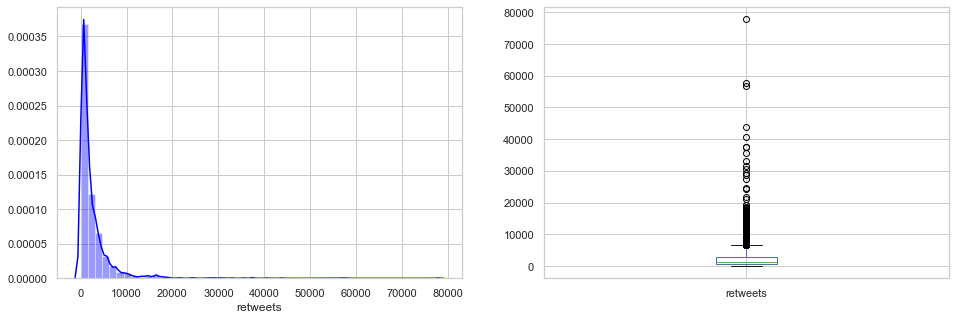

In [126]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'blue')


plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))

plt.show()

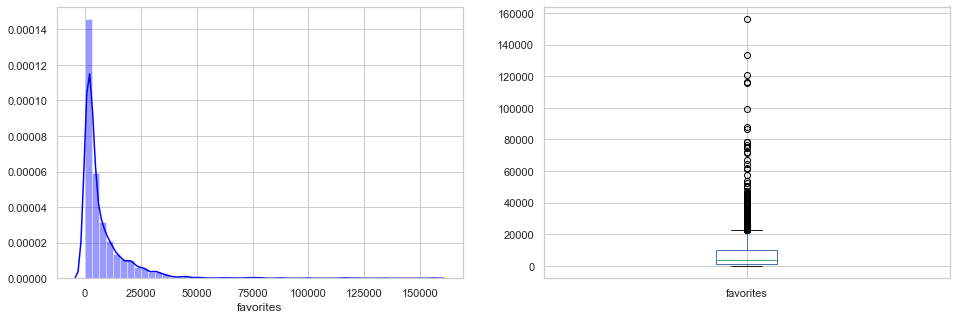

In [127]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'blue')


plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))

plt.show()

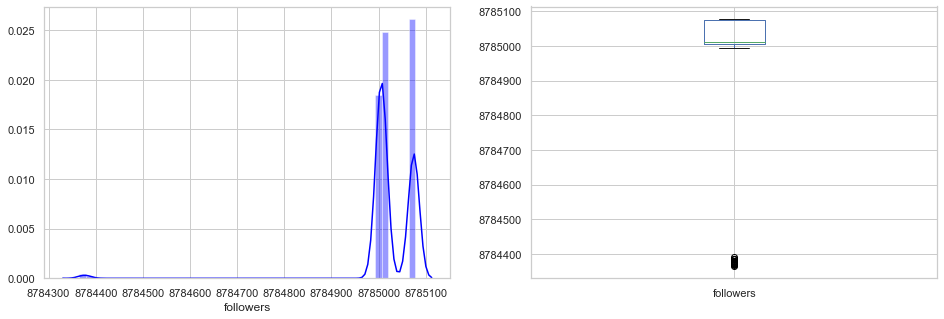

In [128]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['followers'], color = 'blue')


plt.subplot(122)
archive_clean['followers'].plot.box(figsize=(16,5))

plt.show()

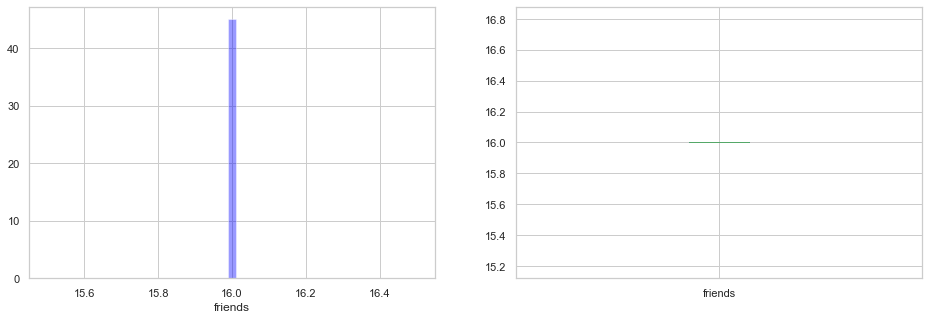

In [129]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['friends'], color = 'blue')


plt.subplot(122)
archive_clean['friends'].plot.box(figsize=(16,5))

plt.show()

Let us do a log transformation for retweets, favorites and followers only, so that we can normalize the data

In [131]:
# Just capping the values to 1 for whichever values <=0
archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1

In [132]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage', 'favorites_mod', 'retweets_mod'],
      dtype='object')

Text(0.5, 0, 'Favorites - Count')

<Figure size 432x288 with 0 Axes>

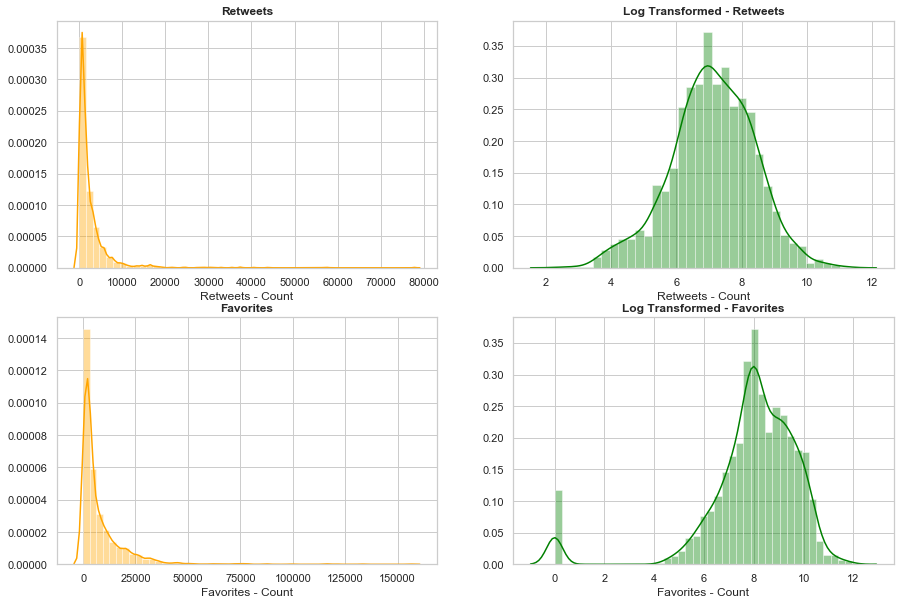

In [133]:
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'orange')
plt.title('Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'green')
plt.title('Log Transformed - Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)
                                                                    

plt.subplot(223)
sns.distplot(archive_clean.favorites, color = 'orange')
plt.title('Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green')
plt.title('Log Transformed - Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

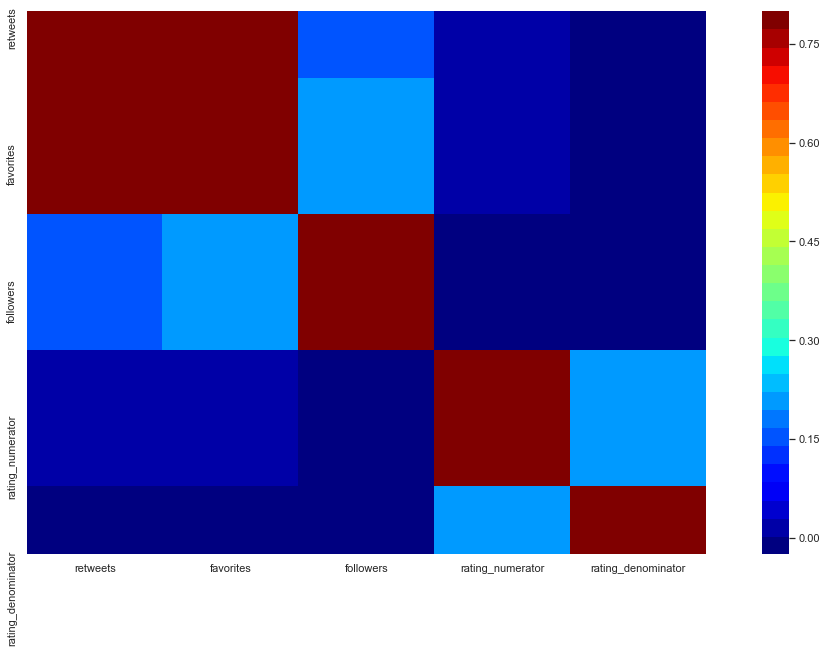

In [134]:
# Correlation between numerical variables
num_cols_data = (archive_clean[['retweets','favorites', 'followers', 'rating_numerator', 'rating_denominator' ]])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(20, 10))
cm1 = cm.get_cmap('jet', 30)
sns.heatmap(matrix, vmax=.8, square=True, cmap=cm1);



   It seems like Retweets and Favorites are highly correlated.This shows that people who have retweeted have also done with favorites tag. Hence both the distributions shows similar behaviour

To confirm the above behavior, let us do a scatter plot between Retweet and Favorites


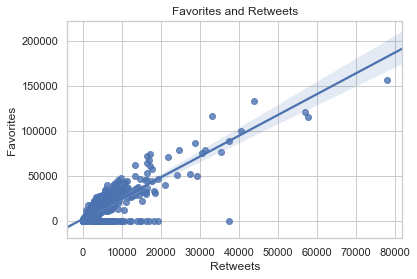

In [135]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')

Text(0, 0.5, 'Count %')

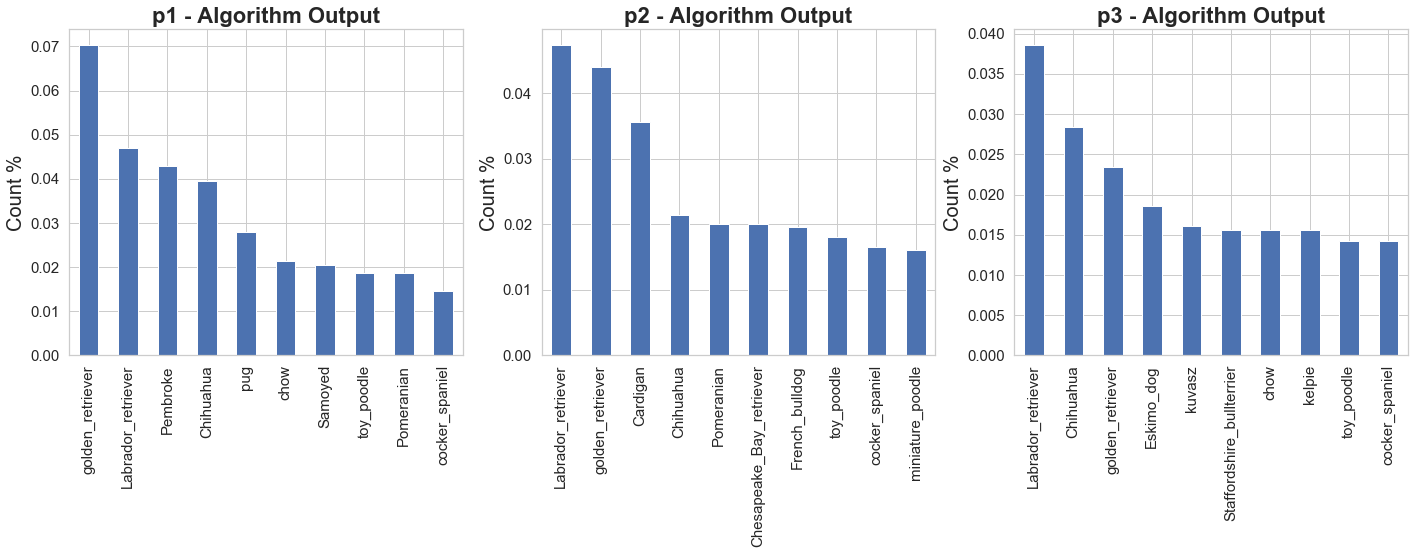

In [136]:
plt.figure(1)
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

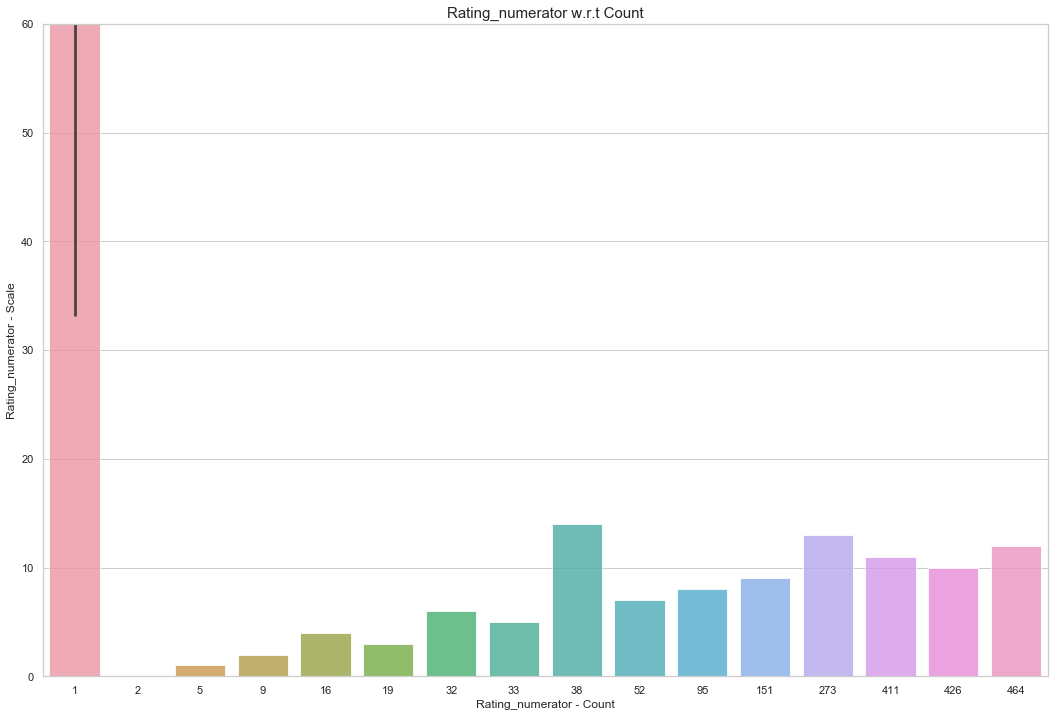

In [147]:
# Top rating_numerator values based on the count
cnt_srs = archive_clean['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.ylim(0, 60)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()

Rating numerator have majority of the ratings around 10

In [138]:
archive_clean[archive_clean['rating_denominator'] < 10].shape

(2, 30)

In [139]:
archive_clean[archive_clean['rating_denominator'] > 10].shape

(16, 30)

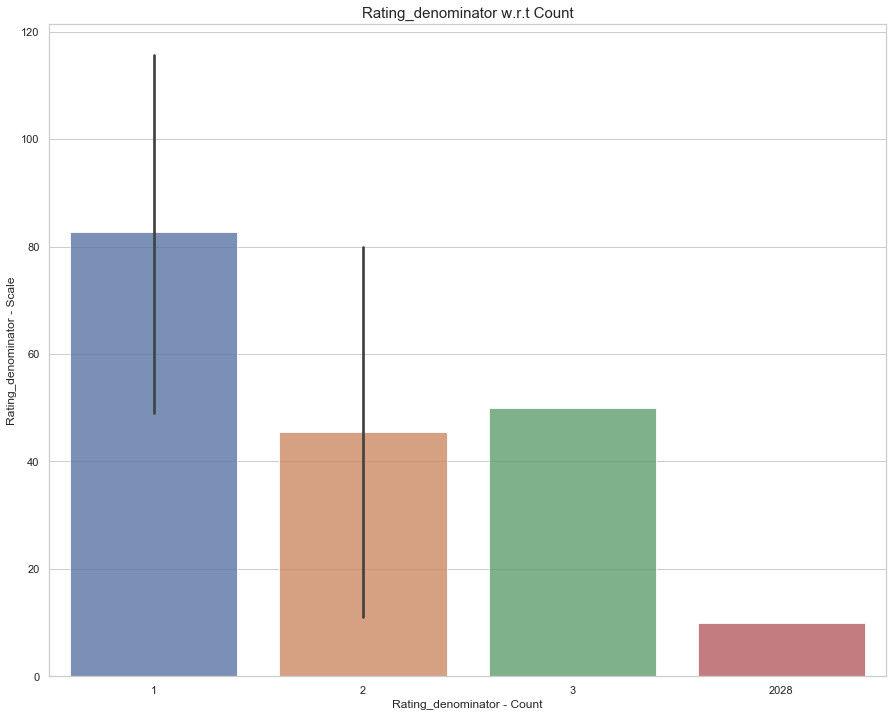

In [140]:
# Top rating_denominator values based on the count
cnt_srs = archive_clean['rating_denominator'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_denominator - Count', fontsize=12)
plt.ylabel('Rating_denominator - Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=15)
plt.show()

1. Normally there must be rating denominator with only 10, but sometimes users with exaggeration (may be) rated with < 10 and > 10.

2. So overall we have 16 records with the above scenario and all other tweets are rated on 10

3. 2028 tweets have 10 rating

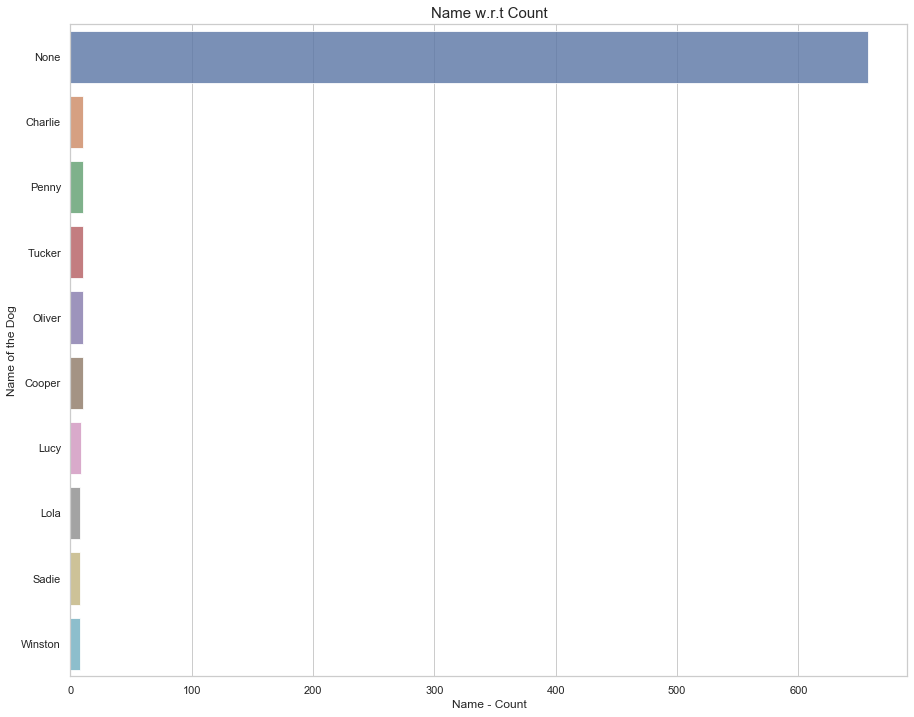

In [142]:
# Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

Majority of the Dog names are "None"

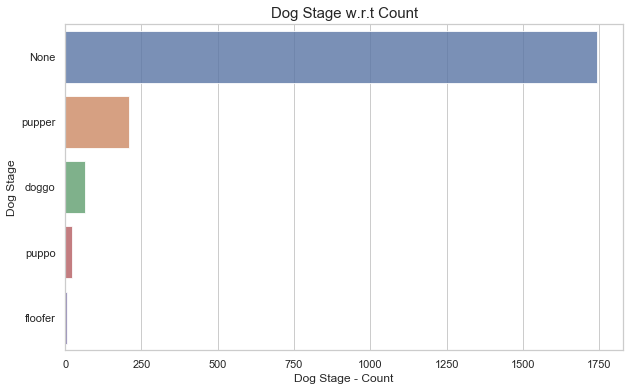

In [143]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

Majority of the tweets did not categorize the Dog stages but after this the dogs are having higher count with pupper